# EDA 

### Loading

In [8]:
# Imports 
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import torch
import umap
import hdbscan
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Using the clean data and embedding model to create BERTopic model

# Loading the clean df and gettign EDA viz  
df_path = '../cleaned_data/amazon_clean/amazon_reviewsAll_Beauty.jsonl'

#Reading to get the first rows
records = []
with open(df_path, 'r') as f:
    for i, line in enumerate(f):
        if i < 5:  # Read first 5 records
            records.append(json.loads(line))
        else:
            break

#Structure of the df 
print("Sample records:")
for i, record in enumerate(records):
    print(f"\nRecord {i+1}:")
    print(json.dumps(record, indent=2))

# Load all data into DataFrame
df_reviews = pd.read_json(df_path, lines=True)
print(f"\n\nDataset shape: {df_reviews.shape}")
print(f"\nColumn names: {df_reviews.columns.tolist()}")
print(f"\nFirst few rows:")
print(df_reviews.head())
print(f"\nData types:\n{df_reviews.dtypes}")


Sample records:

Record 1:
{
  "rating": 5.0,
  "title": "such a lovely scent but not overpowering",
  "text": "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!",
  "images": [],
  "asin": "B00YQ6X8EO",
  "parent_asin": "B00YQ6X8EO",
  "user_id": "AGKHLEW2SOWHNMFQIJGBECAF7INQ",
  "timestamp": 1588687728923,
  "helpful_vote": 0,
  "verified_purchase": true
}

Record 2:
{
  "rating": 4.0,
  "title": "works great but smells a little weird",
  "text": "This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)",
  "images": [],
  "asin": "B081TJ8YS3",
  "parent_asin": 

## Statistics & Distribution

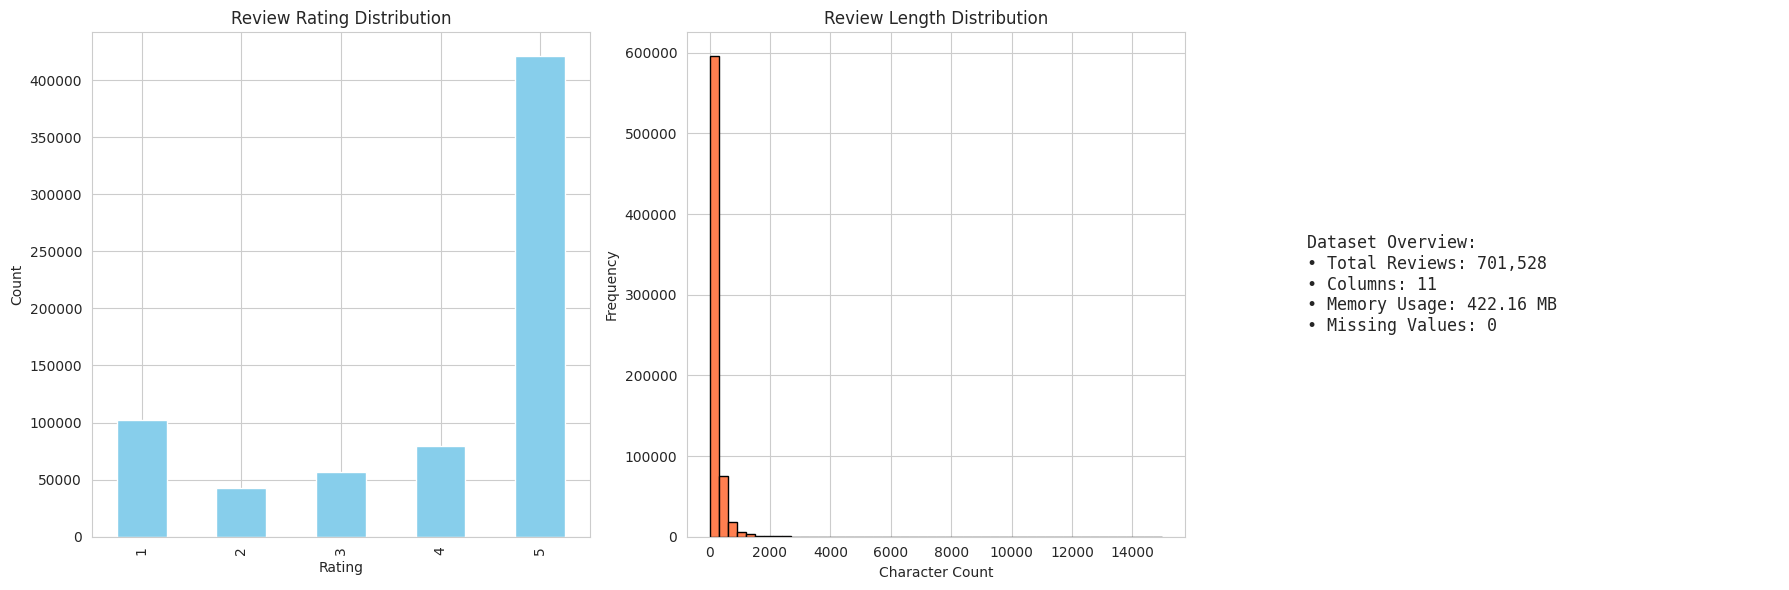

In [16]:
#EDA  getting basic stats & distribution of the data.  

# Style & panel 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 6)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Rating Distribution -->  seeing ig there are  more postivie or negative ratings. 
if 'rating' in df_reviews.columns:
    df_reviews['rating'].value_counts().sort_index().plot(
        kind='bar', ax=axes[0], color='skyblue'
    )
    axes[0].set_title('Review Rating Distribution')
    axes[0].set_xlabel('Rating')
    axes[0].set_ylabel('Count')

#gettng the length of the reviews adn whehter most of them are long or short
text_col = 'review_body' if 'review_body' in df_reviews.columns else 'text'
df_reviews['review_length'] = df_reviews[text_col].str.len()

axes[1].hist(df_reviews['review_length'], bins=50, color='coral', edgecolor='black')
axes[1].set_title('Review Length Distribution')
axes[1].set_xlabel('Character Count')
axes[1].set_ylabel('Frequency')

# Overall stats with missing vals. 
axes[2].axis('off')
stats_text = f"""
Dataset Overview:
• Total Reviews: {len(df_reviews):,}
• Columns: {len(df_reviews.columns)}
• Memory Usage: {df_reviews.memory_usage(deep=True).sum() / 1024**2:.2f} MB
• Missing Values: {df_reviews.isnull().sum().sum()}
"""
axes[2].text(0.05, 0.5, stats_text, fontsize=12, verticalalignment='center', family='monospace')

plt.tight_layout()
plt.show()


In [19]:
# Saving the stats and distribution. 
fig.savefig("../data/eda_results/eda_stats_dist.png", dpi=300, bbox_inches='tight')


In [ ]:
# Visualization 2: Interactive visualizations with Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Rating distribution (interactive)
if 'rating' in df_reviews.columns:
    rating_counts = df_reviews['rating'].value_counts().sort_index()
    fig1 = px.bar(
        x=rating_counts.index,
        y=rating_counts.values,
        labels={'x': 'Rating', 'y': 'Count'},
        title='Interactive Rating Distribution',
        color=rating_counts.values,
        color_continuous_scale='Viridis'
    )
    fig1.show()

# Review text statistics
if 'review_body' in df_reviews.columns or 'text' in df_reviews.columns:
    text_col = 'review_body' if 'review_body' in df_reviews.columns else 'text'
    
    # Word count per review
    df_reviews['word_count'] = df_reviews[text_col].str.split().str.len()
    
    fig2 = px.histogram(
        df_reviews,
        x='word_count',
        nbins=50,
        title='Word Count Distribution in Reviews',
        labels={'word_count': 'Number of Words'},
        color_discrete_sequence=['indianred']
    )
    fig2.update_xaxes(title_text="Number of Words")
    fig2.update_yaxes(title_text="Frequency")
    fig2.show()

print("Interactive visualizations complete!")